In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from sklearn.model_selection import train_test_split

In [2]:
optdigits_df=pd.read_csv('optdigits_csv.csv')
optdigits_df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [3]:
optdigits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   5620 non-null   int64
 1   input2   5620 non-null   int64
 2   input3   5620 non-null   int64
 3   input4   5620 non-null   int64
 4   input5   5620 non-null   int64
 5   input6   5620 non-null   int64
 6   input7   5620 non-null   int64
 7   input8   5620 non-null   int64
 8   input9   5620 non-null   int64
 9   input10  5620 non-null   int64
 10  input11  5620 non-null   int64
 11  input12  5620 non-null   int64
 12  input13  5620 non-null   int64
 13  input14  5620 non-null   int64
 14  input15  5620 non-null   int64
 15  input16  5620 non-null   int64
 16  input17  5620 non-null   int64
 17  input18  5620 non-null   int64
 18  input19  5620 non-null   int64
 19  input20  5620 non-null   int64
 20  input21  5620 non-null   int64
 21  input22  5620 non-null   int64
 22  input23  5620 non-null  

In [4]:
optdigits_df.describe()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
count,5620.0,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.0,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,...,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093,4.495196
std,0.0,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,...,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558,2.868131
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,...,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [5]:
X,Y = train_test_split(optdigits_df,test_size=0.20, random_state=1)
print(X.shape)
print(Y.shape)

(4496, 65)
(1124, 65)


In [6]:
X_without_label = X.iloc[:,0:64].values
print(X_without_label.shape)

(4496, 64)


In [7]:
X_with_label = X.iloc[:,:].values
print(X_with_label.shape)

(4496, 65)


In [8]:
K=10
m=X_without_label.shape[0]
i = 0
Centroids=np.array([]).reshape(64,0)
while(i<10):
    rand=rd.randint(0,m-1)
    if(X_with_label[rand,64] == i):
        Centroids=np.c_[Centroids,X_without_label[rand]]
        i = i + 1

# title1

In [9]:
num_iter=100
Output={}
for n in range(100):

    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X_without_label-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)

    Z={}
    for k in range(K):
        Z[k]=np.array([]).reshape(64,0)
        Output[k]=np.array([]).reshape(65,0)
    for i in range(m):
        Z[C[i]]=np.c_[Z[C[i]],X_without_label[i]]
        Output[C[i]]=np.c_[Output[C[i]],X_with_label[i]]     
    for k in range(K):
        Z[k]=Z[k].T
    for k in range(K):
        Centroids[:,k]=np.mean(Z[k],axis=0)

In [10]:
Centroids.shape

(64, 10)

In [11]:
for i  in range(0,10):
    print("cluster "+str(i))
    print(Output[i][64,:])

cluster 0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

First 50 elemets are drawn from each clusters
Cluster 0
445 elements


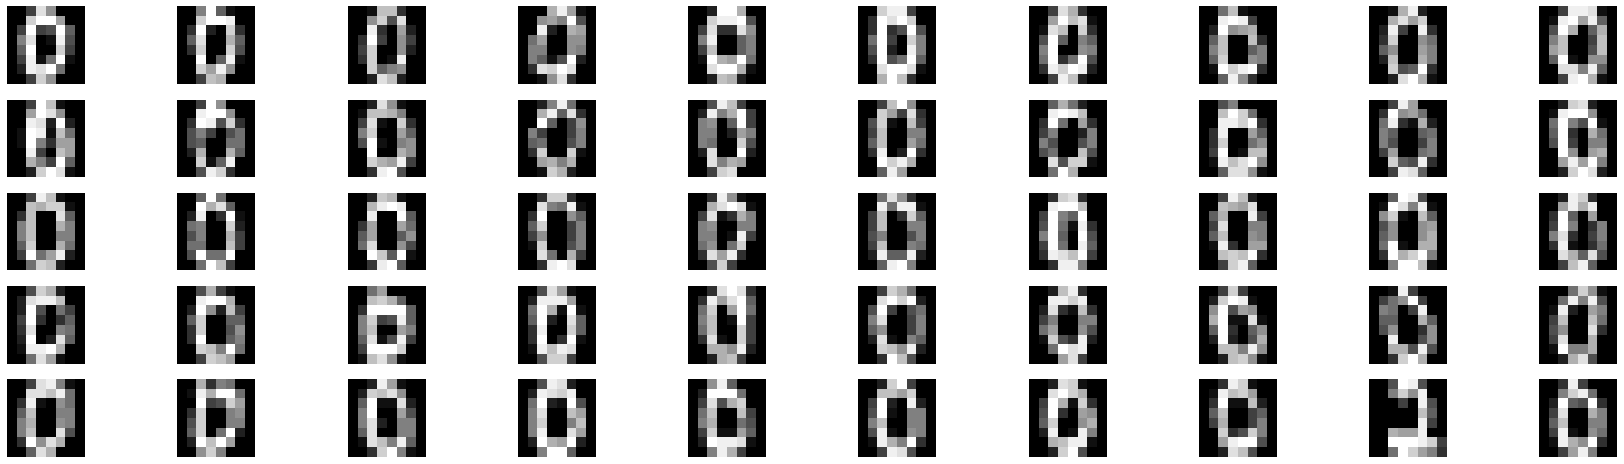

Cluster 1
589 elements


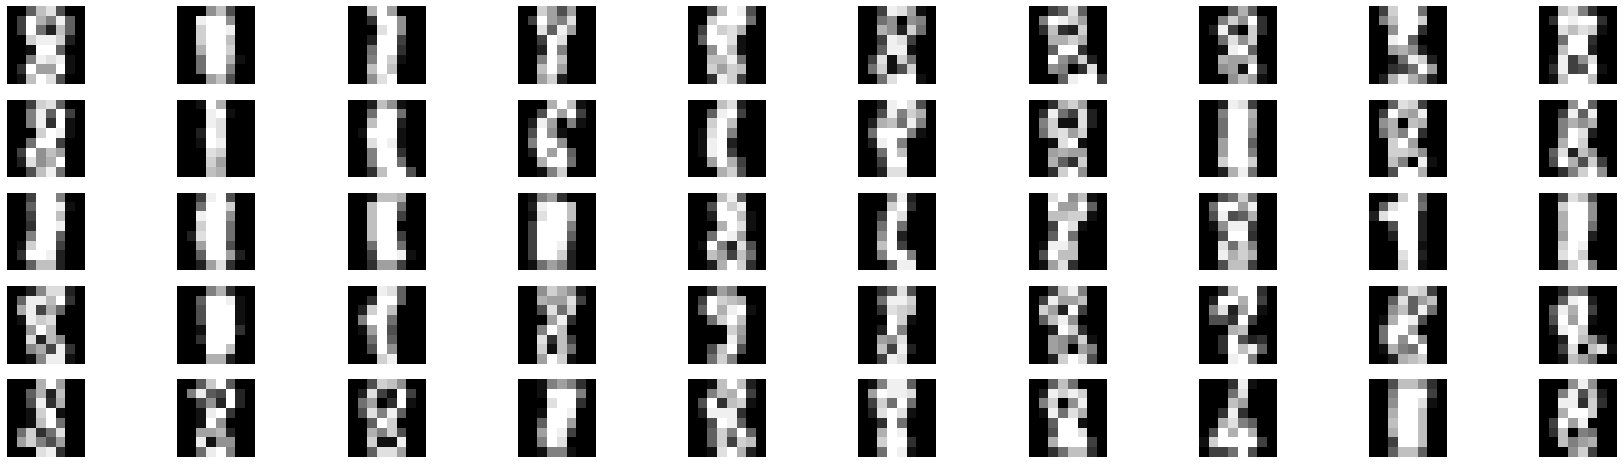

Cluster 2
438 elements


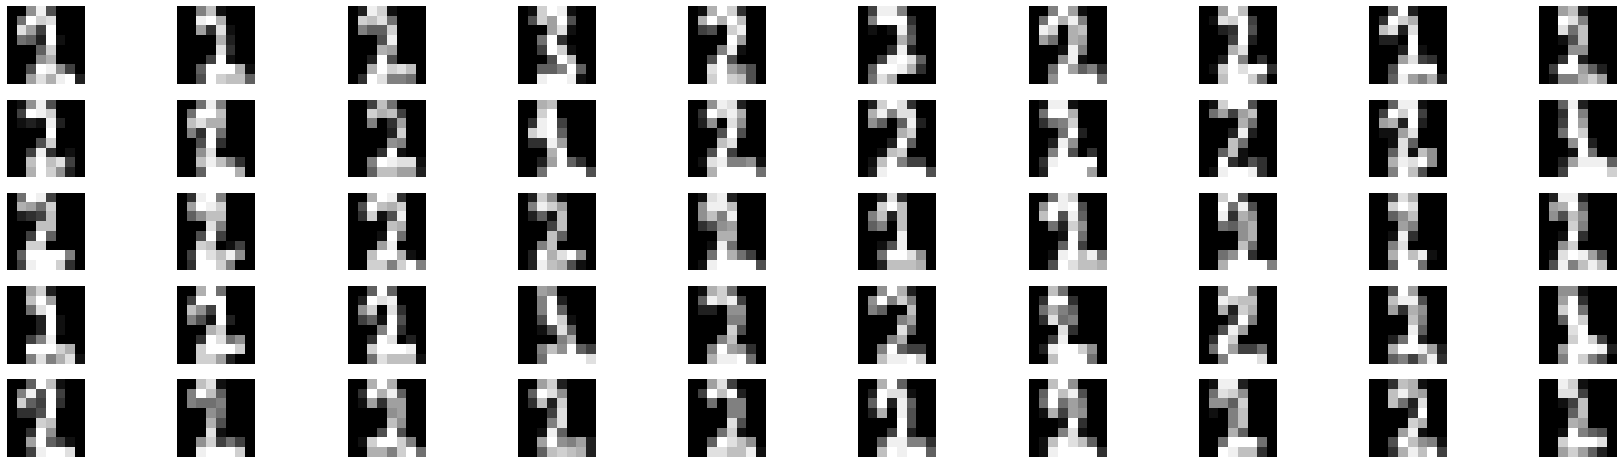

Cluster 3
466 elements


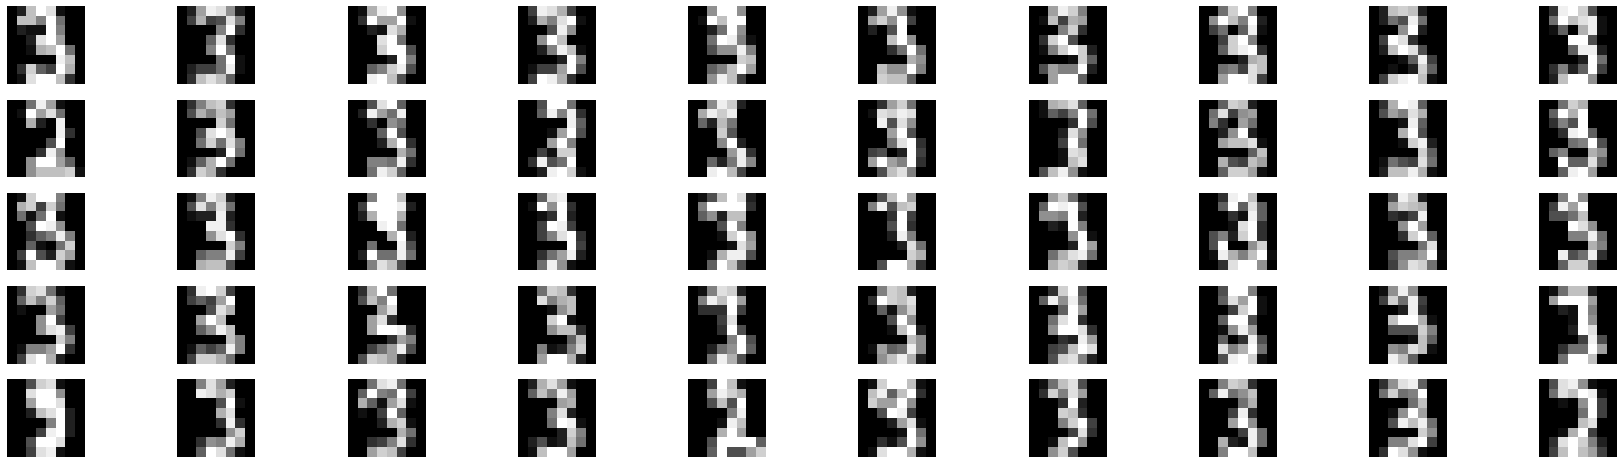

Cluster 4
400 elements


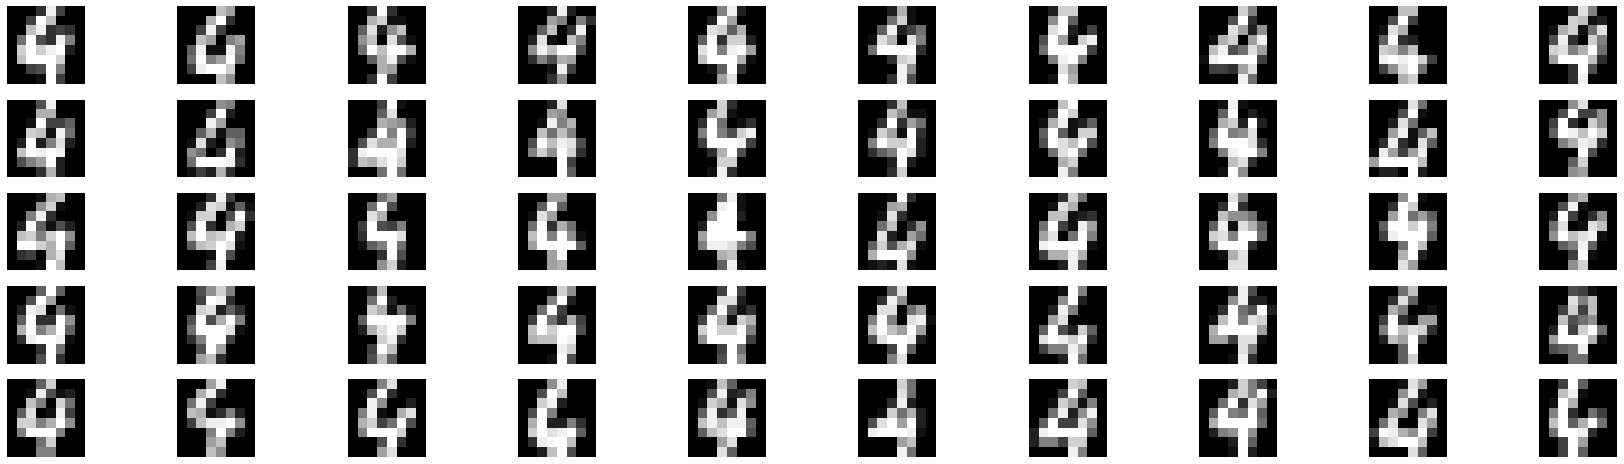

Cluster 5
358 elements


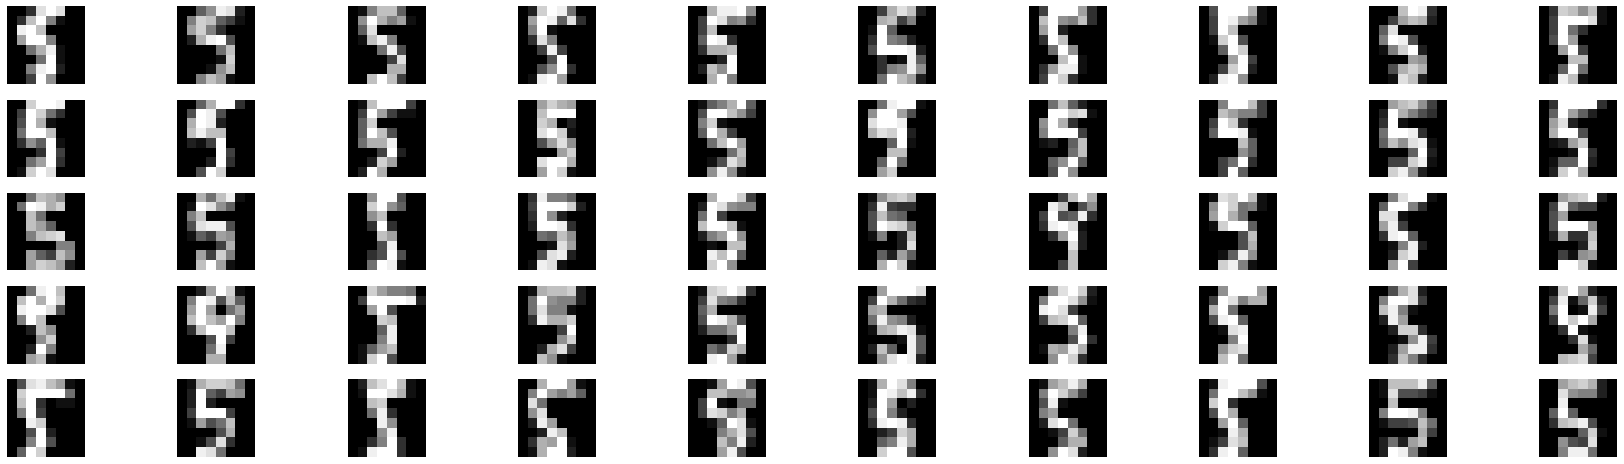

Cluster 6
457 elements


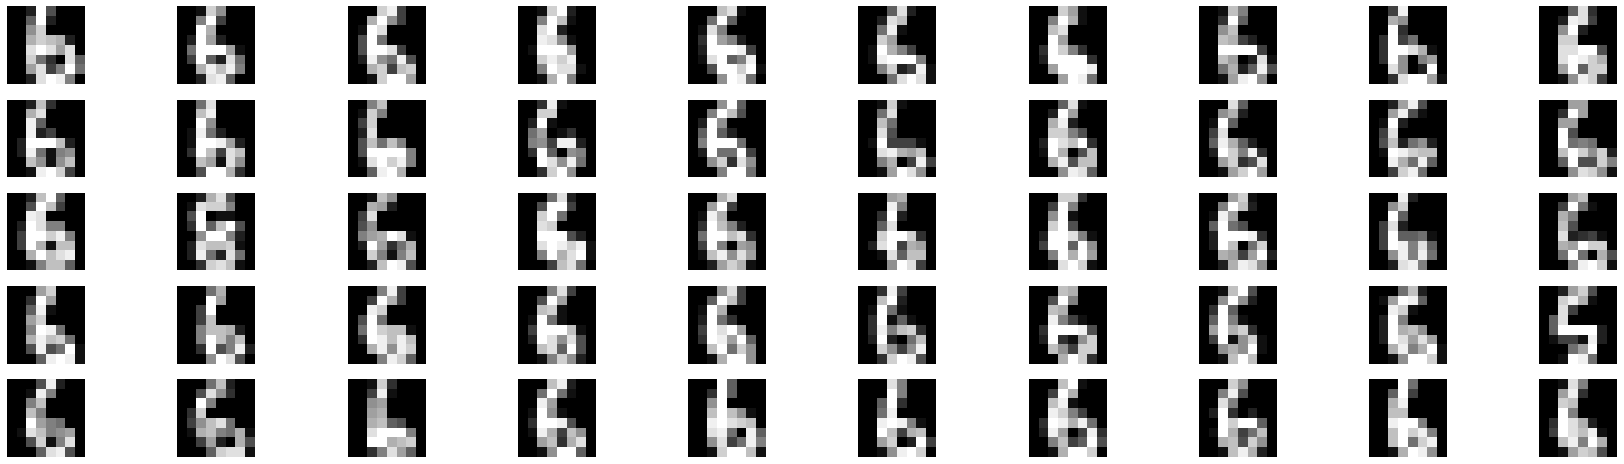

Cluster 7
517 elements


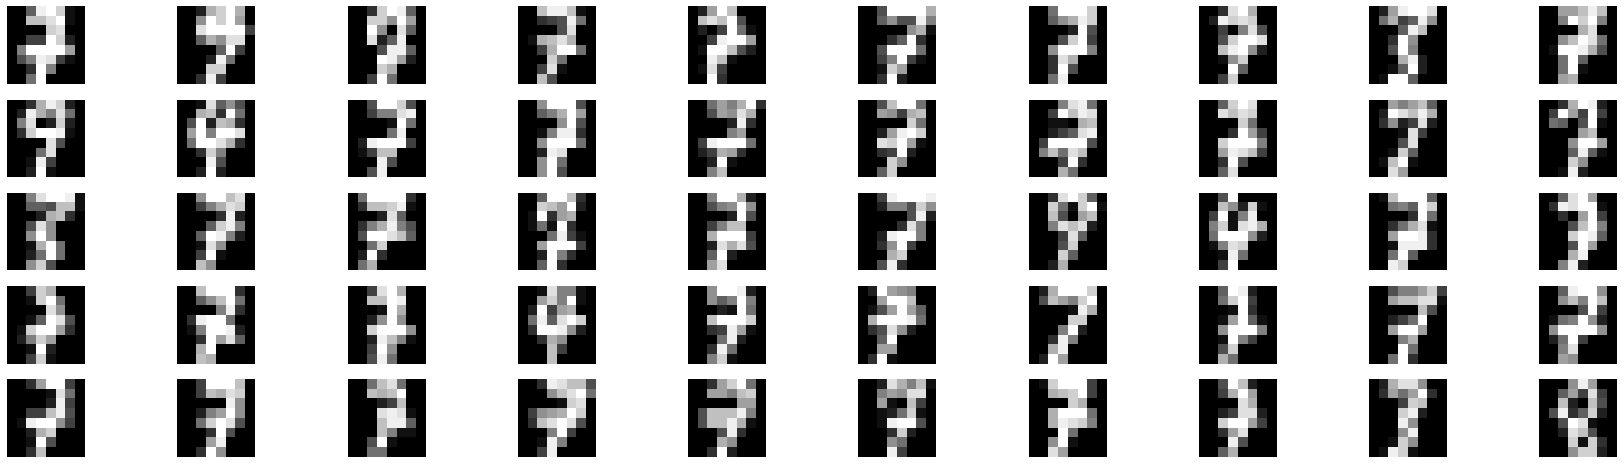

Cluster 8
256 elements


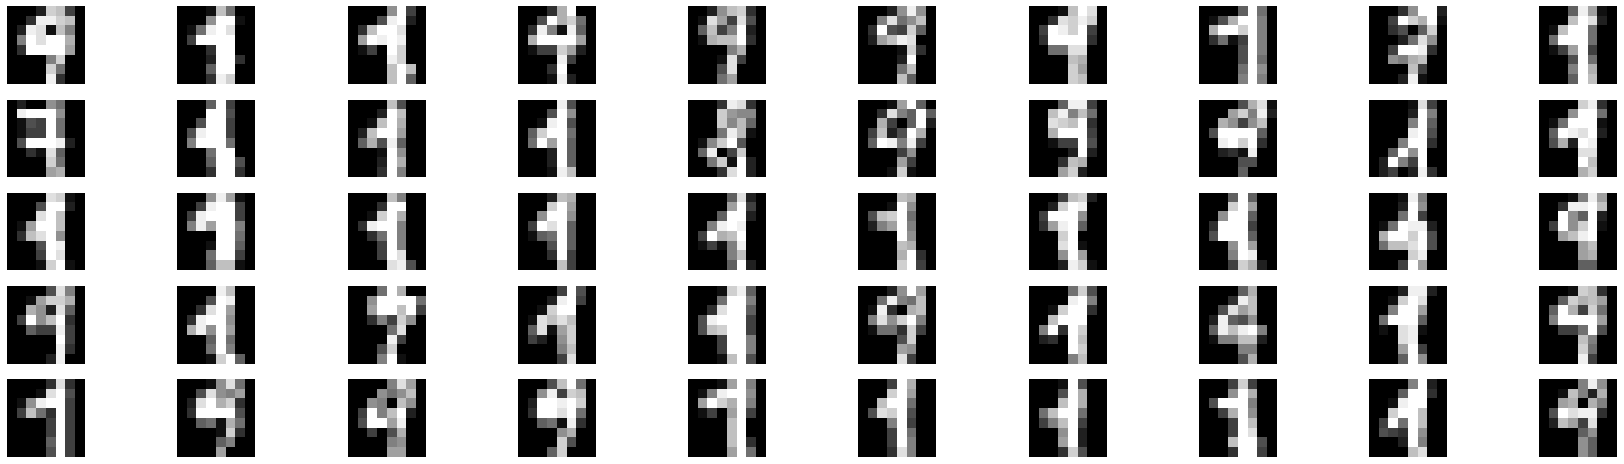

Cluster 9
570 elements


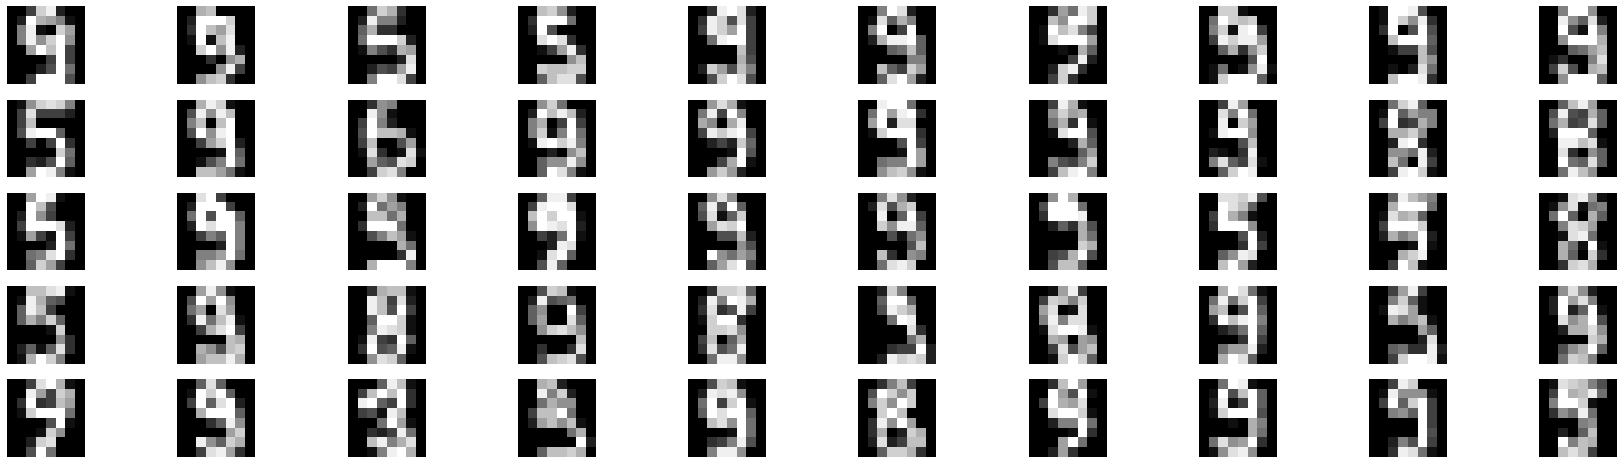

In [12]:
print("First 50 elemets are drawn from each clusters")

for j in range(0,10):
    plt.figure(figsize=(30,10))
    print('Cluster ' + str(j))
    numOfRows = 50
    print(str(Output[j].shape[1]) + " elements")
    for i in range(0,50):
        plt.subplot(5+1,10,i+1)
        image = Output[j][0:64,i]
        image = image.reshape(8,8)
        plt.imshow(image,cmap='gray')
        plt.axis('off')
    plt.show()

In [13]:
#testing for accuracy
Y_data = Y.iloc[:,0:64].values
Y_label = Y.iloc[:,64].values

In [14]:
number_of_test_data = Y_data.shape[0]

In [15]:
EuclidianDistance=np.array([]).reshape(number_of_test_data,0)
for k in range(K):
    tempDist=np.sum((Y_data-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
predicted_value=np.argmin(EuclidianDistance,axis=1)

In [16]:
number_of_correct_prediction = 0
for i in range(0,predicted_value.shape[0]):
    if(predicted_value[i] == Y_label[i]):
        number_of_correct_prediction = number_of_correct_prediction + 1
print(number_of_correct_prediction)

844


In [17]:
accuracy = number_of_correct_prediction/number_of_test_data * 100
print(accuracy)

75.08896797153025
